In [22]:
import analysis
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as sg

%matplotlib inline

In [23]:
data_path = '/media/labrat/395Mount/FSL_work/SH/SH_031_05052017_EDITS.txt'

In [24]:
meants_path = '/media/labrat/395Mount/FSL_work/SH031/BOLD/meants.txt'

In [25]:
data = pd.read_csv(data_path, sep='\t|,', names=['Time', 'O2', 'CO2'],
                 usecols=['Time', 'O2', 'CO2'], index_col=False)[['Time', 'O2', 'CO2']]
filtered_O2 = analysis.fourier_filter(data.Time[1], data.O2, 3,25).real
filtered_CO2 = analysis.fourier_filter(data.Time[1], data.CO2, 3,25).real

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [26]:
meants = np.loadtxt(meants_path,delimiter='\n')
print(len(meants))

320


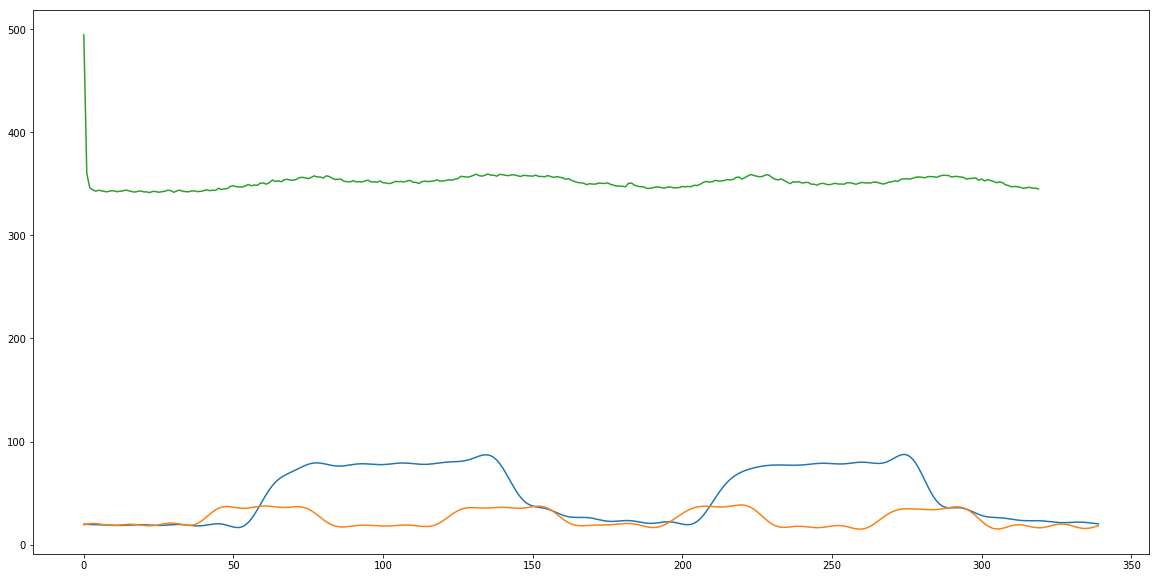

In [27]:
plt.figure(figsize=(20,10))
plt.plot(filtered_O2)
plt.plot(filtered_CO2)
plt.plot(meants)

plt.show()

In [28]:
np.savetxt("O2.contrast", filtered_O2, delimiter='\n')

np.savetxt("CO2.contrast", filtered_CO2, delimiter='\n')